In \[1\]:

    # Initialize Otter
    import otter
    grader = otter.Notebook()

# Project 1: Food Safety<a href="#Project-1:-Food-Safety" class="anchor-link">¶</a>

## Cleaning and Exploring Data with Pandas<a href="#Cleaning-and-Exploring-Data-with-Pandas"
class="anchor-link">¶</a>

## Due Date: Thursday 09/24, 11:59 PM<a href="#Due-Date:-Thursday-09/24,-11:59-PM" class="anchor-link">¶</a>

## Collaboration Policy<a href="#Collaboration-Policy" class="anchor-link">¶</a>

Data science is a collaborative activity. While you may talk with others
about the project, we ask that you **write your solutions
individually**. If you do discuss the assignments with others please
**include their names** at the top of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment<a href="#This-Assignment" class="anchor-link">¶</a>

In this project, we will investigate restaurant food safety scores for
restaurants in San Francisco. The scores and violation information have
been [made available by the San Francisco Department of Public
Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i).
The main goal for this assignment is to walk through the process of Data
Cleaning and EDA.

As we clean and explore these data, you will gain practice with:

-   Reading simple csv files and using Pandas
-   Working with data at different levels of granularity
-   Identifying the type of data collected, missing values, anomalies,
    etc.
-   Exploring characteristics and distributions of individual variables

## Score Breakdown<a href="#Score-Breakdown" class="anchor-link">¶</a>

| Question | Points |
|----------|--------|
| 1a       | 1      |
| 1b       | 0      |
| 1c       | 0      |
| 1d       | 3      |
| 1e       | 1      |
| 2a       | 1      |
| 2b       | 1      |
| 2ci      | 1      |
| 2cii     | 1      |
| 2d       | 2      |
| 3a       | 1      |
| 3b       | 2      |
| 3ci      | 1      |
| 3cii     | 1      |
| 3d       | 3      |
| 3e       | 2      |
| 3f       | 2      |
| 4a       | 1      |
| 4bi      | 1      |
| 4bii     | 1      |
| 4biii    | 1      |
| 4ci      | 1      |
| 4cii     | 1      |
| 4ciii    | 1      |
| 4civ     | 1      |
| 4di      | 2      |
| 4dii     | 2      |
| 4e       | 2      |
| 5a       | 2      |
| 5b       | 3      |
| 5c       | 2      |
| 5d       | 2      |
| 6a       | 1      |
| 6b       | 2      |
| 7a       | 2      |
| 7b       | 1      |
| 7ci      | 4      |
| 7cii     | 2      |
| 7d       | 2      |
| 7e       | 1      |
| 7f       | 1      |
| 7g       | 3      |
| 8a       | 4      |
| 8b       | 4      |
| Total    | 73     |

## Before You Start<a href="#Before-You-Start" class="anchor-link">¶</a>

For each question in the assignment, please write down your answer in
the answer cell(s) right below the question.

We understand that it is helpful to have extra cells breaking down the
process towards reaching your final answer. If you happen to create new
cells below your answer to run codes, **NEVER** add cells between a
question cell and the answer cell below it. It will cause errors when we
run the autograder, and it will sometimes cause a failure to generate
the PDF file.

**Important note: The local autograder tests will not be comprehensive.
You can pass the automated tests in your notebook but still fail tests
in the autograder.** Please be sure to check your results carefully.

Finally, unless we state otherwise, try to avoid using python for loops
or list comprehensions. The majority of this assignment can be done
using builtin commands in Pandas and numpy.

In \[2\]:

    import numpy as np
    import pandas as pd

    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    plt.style.use('fivethirtyeight')

    import zipfile
    import os # Used to interact with the file system

## Obtaining the Data<a href="#Obtaining-the-Data" class="anchor-link">¶</a>

### File Systems and I/O<a href="#File-Systems-and-I/O" class="anchor-link">¶</a>

In general, we will focus on using python commands to investigate files.
However, it can sometimes be easier to use shell commands in your local
operating system. The following cells demonstrate how to do this.

In \[3\]:

    from pathlib import Path
    data_dir = Path('.')
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path('data.zip')
    dest_path = file_path

After running the cell above, if you list the contents of the directory
containing this notebook, you should see `data.zip`.

*Note*: The command below starts with an `!`. This tells our Jupyter
notebook to pass this command to the operating system. In this case, the
command is the `ls` Unix command which lists files in the current
directory.

In \[4\]:

    !ls 

    data  data.zip ds100_utils.py  pics  proj1.ipynb  __pycache__  tests

## 1: Loading Food Safety Data<a href="#1:-Loading-Food-Safety-Data" class="anchor-link">¶</a>

We have data, but we don't have any specific questions about the data
yet. Let's focus on understanding the structure of the data; this
involves answering questions such as:

-   Is the data in a standard format or encoding?
-   Is the data organized in records?
-   What are the fields in each record?

Let's start by looking at the contents of `data.zip`. It's not a just
single file but rather a compressed directory of multiple files. We
could inspect it by uncompressing it using a shell command such as
`!unzip data.zip`, but in this project we're going to do almost
everything in Python for maximum portability.

## Question 1a: Looking Inside and Extracting the Zip Files<a href="#Question-1a:-Looking-Inside-and-Extracting-the-Zip-Files"
class="anchor-link">¶</a>

Assign `my_zip` to a `zipfile.Zipfile` object representing `data.zip`,
and assign `list_names` to a list of all the names of the contents in
`data.zip`.

Hint: The [Python docs](https://docs.python.org/3/library/zipfile.html)
describe how to create a `zipfile.ZipFile` object.

In \[5\]:

    my_zip = zipfile.ZipFile(dest_path, 'r')
    list_names = [file.filename for file in my_zip.infolist()][1:]
    list_names

Out\[5\]:

    ['data/bus.csv',
     'data/ins.csv',
     'data/ins2vio.csv',
     'data/vio.csv',
     'data/sf_zipcodes.json',
     'data/legend.csv']

In \[6\]:

    grader.check("q1a")

Out\[6\]:

All tests passed!

In your answer above, if you have written something like
`zipfile.ZipFile('data.zip', ...)`, we suggest changing it to read
`zipfile.ZipFile(dest_path, ...)`. In general, we **strongly suggest
having your filenames hard coded as string literals only once** in a
notebook. It is very dangerous to hard code things twice because if you
change one but forget to change the other, you can end up with bugs that
are very hard to find.

Now display the files' names and their sizes. Format your solution by
printing each file and its size on a new line.

If you're not sure how to proceed, read about the attributes of a
`ZipFile` object in the Python docs linked above.

In \[7\]:

    info = my_zip.infolist()
    for i in range(1, len(info)):
        print(info[i].filename, info[i].file_size)

    data/bus.csv 665365
    data/ins.csv 1860919
    data/ins2vio.csv 1032799
    data/vio.csv 4213
    data/sf_zipcodes.json 474
    data/legend.csv 120

Often when working with zipped data, we'll never unzip the actual
zipfile. This saves space on our local computer. However, for this
project the files are small, so we're just going to unzip everything.
This has the added benefit that you can look inside the csv files using
a text editor, which might be handy for understanding the structure of
the files. The cell below will unzip the csv files into a subdirectory
called `data`. Simply run this cell, i.e. don't modify it.

In \[8\]:

    data_dir = Path('.')
    my_zip.extractall(data_dir)
    !ls {data_dir / Path("data")}

    bus.csv  ins2vio.csv  ins.csv  legend.csv  sf_zipcodes.json  vio.csv

The cell above created a folder called `data`, and in it there should be
five CSV files. Let's open up `legend.csv` to see its contents. To do
this, click on 'Jupyter' in the top left, then navigate to
`fa20/proj/proj1/data/` and click on `legend.csv`. The file will open up
in another tab. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

## Question 1b<a href="#Question-1b" class="anchor-link">¶</a>

The `legend.csv` file does indeed look like a well-formed CSV file.
Let's check the other three files. Rather than opening up each file
manually, let's use Python to print out the first 5 lines of each. The
`ds100_utils` library has a method called `head` that will allow you to
retrieve the first N lines of a file as a list. For example
`ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines
of "data/legend.csv". Try using this function to print out the first 5
lines of all six files that we just extracted from the zipfile.

In \[9\]:

    import ds100_utils
    for name in list_names:
        display(ds100_utils.head(name, 5))

    ['"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n',
     '"1000","HEUNG YUEN RESTAURANT","3279 22nd St","San Francisco","CA","94110","37.755282","-122.420493","-9999"\n',
     '"100010","ILLY CAFFE SF_PIER 39","PIER 39  K-106-B","San Francisco","CA","94133","-9999","-9999","+14154827284"\n',
     '"100017","AMICI\'S EAST COAST PIZZERIA","475 06th St","San Francisco","CA","94103","-9999","-9999","+14155279839"\n',
     '"100026","LOCAL CATERING","1566 CARROLL AVE","San Francisco","CA","94124","-9999","-9999","+14155860315"\n']

    ['"iid","date","score","type"\n',
     '"100010_20190329","03/29/2019 12:00:00 AM","-1","New Construction"\n',
     '"100010_20190403","04/03/2019 12:00:00 AM","100","Routine - Unscheduled"\n',
     '"100017_20190417","04/17/2019 12:00:00 AM","-1","New Ownership"\n',
     '"100017_20190816","08/16/2019 12:00:00 AM","91","Routine - Unscheduled"\n']

    ['"iid","vid"\n',
     '"97975_20190725","103124"\n',
     '"85986_20161011","103114"\n',
     '"95754_20190327","103124"\n',
     '"77005_20170429","103120"\n']

    ['"description","risk_category","vid"\n',
     '"Consumer advisory not provided for raw or undercooked foods","Moderate Risk",103128\n',
     '"Contaminated or adulterated food","High Risk",103108\n',
     '"Discharge from employee nose mouth or eye","Moderate Risk",103117\n',
     '"Employee eating or smoking","Moderate Risk",103118\n']

    ['{"zip_codes": ["94102", "94103", "94104", "94105", "94107", "94108", "94109", "94110", "94111", "94112", "94114", "94115", "94116", "94117", "94118", "94119", "94120", "94121", "94122", "94123", "94124", "94125", "94126", "94127", "94128", "94129", "94130", "94131", "94132", "94133", "94134", "94137", "94139", "94140", "94141", "94142", "94143", "94144", "94145", "94146", "94147", "94151", "94158", "94159", "94160", "94161", "94163", "94164", "94172", "94177", "94188"]}']

    ['"Minimum_Score","Maximum_Score","Description"\n',
     '0,70,"Poor"\n',
     '71,85,"Needs Improvement"\n',
     '86,90,"Adequate"\n',
     '91,100,"Good"\n']

## Question 1c: Reading in the Files<a href="#Question-1c:-Reading-in-the-Files" class="anchor-link">¶</a>

Based on the above information, let's attempt to load `bus.csv`,
`ins2vio.csv`, `ins.csv`, and `vio.csv` into pandas dataframes with the
following names: `bus`, `ins2vio`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`)
will require an additional argument `encoding='ISO-8859-1'` when calling
`pd.read_csv`. At some point in your future, you should read all about
[character
encodings](https://diveintopython3.problemsolving.io/strings.html). We
won't discuss these in detail in DS100.

In \[10\]:

    # path to directory containing data
    dsDir = Path('data')

    bus = pd.read_csv(dsDir/'bus.csv', encoding='ISO-8859-1')
    ins2vio = pd.read_csv(dsDir/'ins2vio.csv')
    ins = pd.read_csv(dsDir/'ins.csv')
    vio = pd.read_csv(dsDir/'vio.csv')


    #This code is essential for the autograder to function properly. Do not edit
    ins_test = ins

Now that you've read in the files, let's try some `pd.DataFrame` methods
([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`,
`ins`, and `vio` dataframes. To show multiple return outputs in one
single cell, you can use `display()`.

In \[11\]:

    display(bus.head())
    display(ins.head())
    display(vio.head())

|     | business id column | name                        | address                | city          | state | postal_code | latitude     | longitude    | phone_number |
|-----|--------------------|-----------------------------|------------------------|---------------|-------|-------------|--------------|--------------|--------------|
| 0   | 1000               | HEUNG YUEN RESTAURANT       | 3279 22nd St           | San Francisco | CA    | 94110       | 37.755282    | -122.420493  | -9999        |
| 1   | 100010             | ILLY CAFFE SF_PIER 39       | PIER 39 K-106-B        | San Francisco | CA    | 94133       | -9999.000000 | -9999.000000 | 14154827284  |
| 2   | 100017             | AMICI'S EAST COAST PIZZERIA | 475 06th St            | San Francisco | CA    | 94103       | -9999.000000 | -9999.000000 | 14155279839  |
| 3   | 100026             | LOCAL CATERING              | 1566 CARROLL AVE       | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14155860315  |
| 4   | 100030             | OUI OUI! MACARON            | 2200 JERROLD AVE STE C | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14159702675  |

|     | iid             | date                   | score | type                  |
|-----|-----------------|------------------------|-------|-----------------------|
| 0   | 100010_20190329 | 03/29/2019 12:00:00 AM | -1    | New Construction      |
| 1   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled |
| 2   | 100017_20190417 | 04/17/2019 12:00:00 AM | -1    | New Ownership         |
| 3   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled |
| 4   | 100017_20190826 | 08/26/2019 12:00:00 AM | -1    | Reinspection/Followup |

|     | description                                       | risk_category | vid    |
|-----|---------------------------------------------------|---------------|--------|
| 0   | Consumer advisory not provided for raw or unde... | Moderate Risk | 103128 |
| 1   | Contaminated or adulterated food                  | High Risk     | 103108 |
| 2   | Discharge from employee nose mouth or eye         | Moderate Risk | 103117 |
| 3   | Employee eating or smoking                        | Moderate Risk | 103118 |
| 4   | Food in poor condition                            | Moderate Risk | 103123 |

The `DataFrame.describe` method can also be handy for computing
summaries of numeric columns of our dataframes. Try it out with each of
our 4 dataframes.

In \[12\]:

    display(bus.describe())
    display(ins2vio.describe())
    display(ins.describe())
    display(vio.describe())

|       | business id column | latitude     | longitude    | phone_number  |
|-------|--------------------|--------------|--------------|---------------|
| count | 6253.000000        | 6253.000000  | 6253.000000  | 6.253000e+03  |
| mean  | 60448.948984       | -5575.337966 | -5645.817699 | 4.701819e+09  |
| std   | 36480.132445       | 4983.390142  | 4903.993683  | 6.667508e+09  |
| min   | 19.000000          | -9999.000000 | -9999.000000 | -9.999000e+03 |
| 25%   | 18399.000000       | -9999.000000 | -9999.000000 | -9.999000e+03 |
| 50%   | 75685.000000       | -9999.000000 | -9999.000000 | -9.999000e+03 |
| 75%   | 90886.000000       | 37.776494    | -122.421553  | 1.415533e+10  |
| max   | 102705.000000      | 37.824494    | 0.000000     | 1.415988e+10  |

|       | vid           |
|-------|---------------|
| count | 40210.000000  |
| mean  | 103133.603357 |
| std   | 16.863080     |
| min   | 103102.000000 |
| 25%   | 103120.000000 |
| 50%   | 103133.000000 |
| 75%   | 103149.000000 |
| max   | 103177.000000 |

|       | score        |
|-------|--------------|
| count | 26663.000000 |
| mean  | 47.227694    |
| std   | 46.094369    |
| min   | -1.000000    |
| 25%   | -1.000000    |
| 50%   | 76.000000    |
| 75%   | 92.000000    |
| max   | 100.000000   |

|       | vid           |
|-------|---------------|
| count | 65.000000     |
| mean  | 103136.276923 |
| std   | 21.001866     |
| min   | 103102.000000 |
| 25%   | 103119.000000 |
| 50%   | 103135.000000 |
| 75%   | 103153.000000 |
| max   | 103177.000000 |

Now, we perform some sanity checks for you to verify that you loaded the
data with the right structure. Run the following cells to load some
basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In \[13\]:

    assert all(bus.columns == ['business id column', 'name', 'address', 'city', 'state', 'postal_code',
                               'latitude', 'longitude', 'phone_number'])
    assert 6250 <= len(bus) <= 6260

    assert all(ins.columns == ['iid', 'date', 'score', 'type'])
    assert 26660 <= len(ins) <= 26670

    assert all(vio.columns == ['description', 'risk_category', 'vid'])
    assert 60 <= len(vio) <= 65

    assert all(ins2vio.columns == ['iid', 'vid'])
    assert 40210 <= len(ins2vio) <= 40220

Next we'll check that the statistics match what we expect. The following
are hard-coded statistical summaries of the correct data.

In \[14\]:

    bus_summary = pd.DataFrame(**{'columns': ['business id column', 'latitude', 'longitude'],
     'data': {'business id column': {'50%': 75685.0, 'max': 102705.0, 'min': 19.0},
      'latitude': {'50%': -9999.0, 'max': 37.824494, 'min': -9999.0},
      'longitude': {'50%': -9999.0,
       'max': 0.0,
       'min': -9999.0}},
     'index': ['min', '50%', 'max']})

    ins_summary = pd.DataFrame(**{'columns': ['score'],
     'data': {'score': {'50%': 76.0, 'max': 100.0, 'min': -1.0}},
     'index': ['min', '50%', 'max']})

    vio_summary = pd.DataFrame(**{'columns': ['vid'],
     'data': {'vid': {'50%': 103135.0, 'max': 103177.0, 'min': 103102.0}},
     'index': ['min', '50%', 'max']})

    from IPython.display import display

    print('What we expect from your Businesses dataframe:')
    display(bus_summary)
    print('What we expect from your Inspections dataframe:')
    display(ins_summary)
    print('What we expect from your Violations dataframe:')
    display(vio_summary)

    What we expect from your Businesses dataframe:

|     | business id column | latitude     | longitude |
|-----|--------------------|--------------|-----------|
| min | 19.0               | -9999.000000 | -9999.0   |
| 50% | 75685.0            | -9999.000000 | -9999.0   |
| max | 102705.0           | 37.824494    | 0.0       |

    What we expect from your Inspections dataframe:

|     | score |
|-----|-------|
| min | -1.0  |
| 50% | 76.0  |
| max | 100.0 |

    What we expect from your Violations dataframe:

|     | vid      |
|-----|----------|
| min | 103102.0 |
| 50% | 103135.0 |
| max | 103177.0 |

The code below defines a testing function that we'll use to verify that
your data has the same statistics as what we expect. Run these cells to
define the function. The `df_allclose` function has this name because we
are verifying that all of the statistics for your dataframe are close to
the expected values. Why not `df_allequal`? It's a bad idea in almost
all cases to compare two floating point values like 37.780435, as
rounding error can cause spurious failures.

## Question 1d: Verifying the data<a href="#Question-1d:-Verifying-the-data" class="anchor-link">¶</a>

Now let's run the automated tests. If your dataframes are correct, then
the following cell will seem to do nothing, which is a good thing!
However, if your variables don't match the correct answers in the main
summary statistics shown above, an exception will be raised.

In \[15\]:

    """Run this cell to load this utility comparison function that we will use in various
    tests below (both tests you can see and those we run internally for grading).

    Do not modify the function in any way.
    """


    def df_allclose(actual, desired, columns=None, rtol=5e-2):
        """Compare selected columns of two dataframes on a few summary statistics.
        
        Compute the min, median and max of the two dataframes on the given columns, and compare
        that they match numerically to the given relative tolerance.
        
        If they don't match, an AssertionError is raised (by `numpy.testing`).
        """    
        # summary statistics to compare on
        stats = ['min', '50%', 'max']
        
        # For the desired values, we can provide a full DF with the same structure as
        # the actual data, or pre-computed summary statistics.
        # We assume a pre-computed summary was provided if columns is None. In that case, 
        # `desired` *must* have the same structure as the actual's summary
        if columns is None:
            des = desired
            columns = desired.columns
        else:
            des = desired[columns].describe().loc[stats]

        # Extract summary stats from actual DF
        act = actual[columns].describe().loc[stats]

        return np.allclose(act, des, rtol)

In \[16\]:

    grader.check("q1d")

Out\[16\]:

All tests passed!

### Question 1e: Identifying Issues with the Data<a href="#Question-1e:-Identifying-Issues-with-the-Data"
class="anchor-link">¶</a>

In \[17\]:

    display(bus.head())
    display(ins.head())
    display(vio.head())

|     | business id column | name                        | address                | city          | state | postal_code | latitude     | longitude    | phone_number |
|-----|--------------------|-----------------------------|------------------------|---------------|-------|-------------|--------------|--------------|--------------|
| 0   | 1000               | HEUNG YUEN RESTAURANT       | 3279 22nd St           | San Francisco | CA    | 94110       | 37.755282    | -122.420493  | -9999        |
| 1   | 100010             | ILLY CAFFE SF_PIER 39       | PIER 39 K-106-B        | San Francisco | CA    | 94133       | -9999.000000 | -9999.000000 | 14154827284  |
| 2   | 100017             | AMICI'S EAST COAST PIZZERIA | 475 06th St            | San Francisco | CA    | 94103       | -9999.000000 | -9999.000000 | 14155279839  |
| 3   | 100026             | LOCAL CATERING              | 1566 CARROLL AVE       | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14155860315  |
| 4   | 100030             | OUI OUI! MACARON            | 2200 JERROLD AVE STE C | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14159702675  |

|     | iid             | date                   | score | type                  |
|-----|-----------------|------------------------|-------|-----------------------|
| 0   | 100010_20190329 | 03/29/2019 12:00:00 AM | -1    | New Construction      |
| 1   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled |
| 2   | 100017_20190417 | 04/17/2019 12:00:00 AM | -1    | New Ownership         |
| 3   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled |
| 4   | 100017_20190826 | 08/26/2019 12:00:00 AM | -1    | Reinspection/Followup |

|     | description                                       | risk_category | vid    |
|-----|---------------------------------------------------|---------------|--------|
| 0   | Consumer advisory not provided for raw or unde... | Moderate Risk | 103128 |
| 1   | Contaminated or adulterated food                  | High Risk     | 103108 |
| 2   | Discharge from employee nose mouth or eye         | Moderate Risk | 103117 |
| 3   | Employee eating or smoking                        | Moderate Risk | 103118 |
| 4   | Food in poor condition                            | Moderate Risk | 103123 |

Use the `head` command on your three files again. This time, describe at
least one potential problem with the data you see. Consider issues with
missing values and bad data.

One potential problem I can see in the business table is that many of
the latitude and longitudes seem to be a default value of -9999 for
incomplete data entries, which could count as both bad or missing
values. Another point is there are a few -1 scores in the ins dataframe
which also seem to be a default placeholder for missing values.

We will explore each file in turn, including determining its granularity
and primary keys and exploring many of the variables individually. Let's
begin with the businesses file, which has been read into the `bus`
dataframe.

  
  
  

------------------------------------------------------------------------

  
  
  

# 2: Examining the Business Data File<a href="#2:-Examining-the-Business-Data-File" class="anchor-link">¶</a>

From its name alone, we expect the `bus.csv` file to contain information
about the restaurants. Let's investigate the granularity of this
dataset.

In \[18\]:

    bus.head()

Out\[18\]:

|     | business id column | name                        | address                | city          | state | postal_code | latitude     | longitude    | phone_number |
|-----|--------------------|-----------------------------|------------------------|---------------|-------|-------------|--------------|--------------|--------------|
| 0   | 1000               | HEUNG YUEN RESTAURANT       | 3279 22nd St           | San Francisco | CA    | 94110       | 37.755282    | -122.420493  | -9999        |
| 1   | 100010             | ILLY CAFFE SF_PIER 39       | PIER 39 K-106-B        | San Francisco | CA    | 94133       | -9999.000000 | -9999.000000 | 14154827284  |
| 2   | 100017             | AMICI'S EAST COAST PIZZERIA | 475 06th St            | San Francisco | CA    | 94103       | -9999.000000 | -9999.000000 | 14155279839  |
| 3   | 100026             | LOCAL CATERING              | 1566 CARROLL AVE       | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14155860315  |
| 4   | 100030             | OUI OUI! MACARON            | 2200 JERROLD AVE STE C | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14159702675  |

  
  
  

------------------------------------------------------------------------

## Question 2a<a href="#Question-2a" class="anchor-link">¶</a>

The `bus` dataframe contains a column called `business id column` which
probably corresponds to a unique business id. However, let's first
rename that column to `bid`. Modify the `bus` dataframe by renaming that
column to `bid`.

**Note**: In practice we might want to do this renaming when the table
is loaded but for grading purposes we will do it here.

In \[19\]:

    bus = bus.rename(columns={"business id column" : "bid"})
    bus.head()

Out\[19\]:

|     | bid    | name                        | address                | city          | state | postal_code | latitude     | longitude    | phone_number |
|-----|--------|-----------------------------|------------------------|---------------|-------|-------------|--------------|--------------|--------------|
| 0   | 1000   | HEUNG YUEN RESTAURANT       | 3279 22nd St           | San Francisco | CA    | 94110       | 37.755282    | -122.420493  | -9999        |
| 1   | 100010 | ILLY CAFFE SF_PIER 39       | PIER 39 K-106-B        | San Francisco | CA    | 94133       | -9999.000000 | -9999.000000 | 14154827284  |
| 2   | 100017 | AMICI'S EAST COAST PIZZERIA | 475 06th St            | San Francisco | CA    | 94103       | -9999.000000 | -9999.000000 | 14155279839  |
| 3   | 100026 | LOCAL CATERING              | 1566 CARROLL AVE       | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14155860315  |
| 4   | 100030 | OUI OUI! MACARON            | 2200 JERROLD AVE STE C | San Francisco | CA    | 94124       | -9999.000000 | -9999.000000 | 14159702675  |

In \[20\]:

    grader.check("q2a")

Out\[20\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 2b<a href="#Question-2b" class="anchor-link">¶</a>

Examining the entries in `bus`, is the `bid` unique for each record
(i.e. each row of data)? Your code should compute the answer, i.e. don't
just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `bid`
series has any duplicates.

In \[21\]:

    is_bid_unique = bus['bid'].unique().size == bus['bid'].size
    is_bid_unique

Out\[21\]:

    True

In \[22\]:

    grader.check("q2b")

Out\[22\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 2c<a href="#Question-2c" class="anchor-link">¶</a>

In the two cells below create two **series**

1.  where the index is the `name` of the business and the value is the
    number of records with that `name`
2.  where the index is the `address` of the business and the value is
    the number of records with that `address`

Order both series in descending order by count. You may need to use
`groupby()`, `size()`, `sort_values()`, or `value_counts()`.

**Step 1**

In \[23\]:

    name_counts = bus.groupby('name').size().sort_values(ascending=False)
    name_counts.head(20)

Out\[23\]:

    name
    Peet's Coffee & Tea                                       20
    Starbucks Coffee                                          13
    Jamba Juice                                               10
    McDonald's                                                10
    STARBUCKS                                                  9
    Proper Food                                                9
    Mixt Greens/Mixt                                           8
    Specialty's Cafe & Bakery                                  8
    Philz Coffee                                               7
    Starbucks                                                  7
    Blue Bottle Coffee                                         7
    The Organic Coup                                           7
    Whole Foods Market                                         7
    BlueStar Refreshment Services @ Uber Technologies, Inc     6
    Lee's Deli                                                 6
    Bon Appetit @ Twitter                                      6
    JW Marriott SF Union Square                                5
    STARBUCKS COFFEE                                           5
    Bon Appetit Management Co                                  5
    Annie's Hot Dogs & Pretzels                                5
    dtype: int64

In \[24\]:

    grader.check("q2ci")

Out\[24\]:

All tests passed!

**Step 2**

In \[25\]:

    address_counts = bus.groupby('address').size().sort_values(ascending=False)
    address_counts.head(10)

Out\[25\]:

    address
    Off The Grid              39
    428 11th St               34
    3251 20th Ave             17
    2948 Folsom St            17
    Pier 41                   16
    103 Horne Ave             14
    24 Willie Mays Plaza      13
    Off the Grid              11
    1 United Nations Plaza    10
    2948 Folsom St.           10
    dtype: int64

In \[26\]:

    grader.check("q2cii")

Out\[26\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 2d<a href="#Question-2d" class="anchor-link">¶</a>

Based on the above calculations answer each of the following questions
by filling the value in the variable.

1.  What does each record represent?
2.  What is the minimal primary key?

In \[27\]:

    # What does each record represent?  Valid answers are:
    #    "One location of a restaurant."
    #    "A chain of restaurants."
    #    "A city block."
    q2d_part1 = "One location of a restaurant."

    # What is the minimal primary key? Valid answers are:
    #    "bid"
    #    "bid, name"
    #    "bid, name, address"
    q2d_part2 = "bid"

In \[28\]:

    grader.check("q2d")

Out\[28\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

  
  
  

# 3: Cleaning the Business Data Postal Codes<a href="#3:-Cleaning-the-Business-Data-Postal-Codes"
class="anchor-link">¶</a>

The business data contains postal code information that we can use to
aggregate the ratings over regions of the city. Let's examine and clean
the postal code field. The postal code (sometimes also called a ZIP
code) partitions the city into regions:

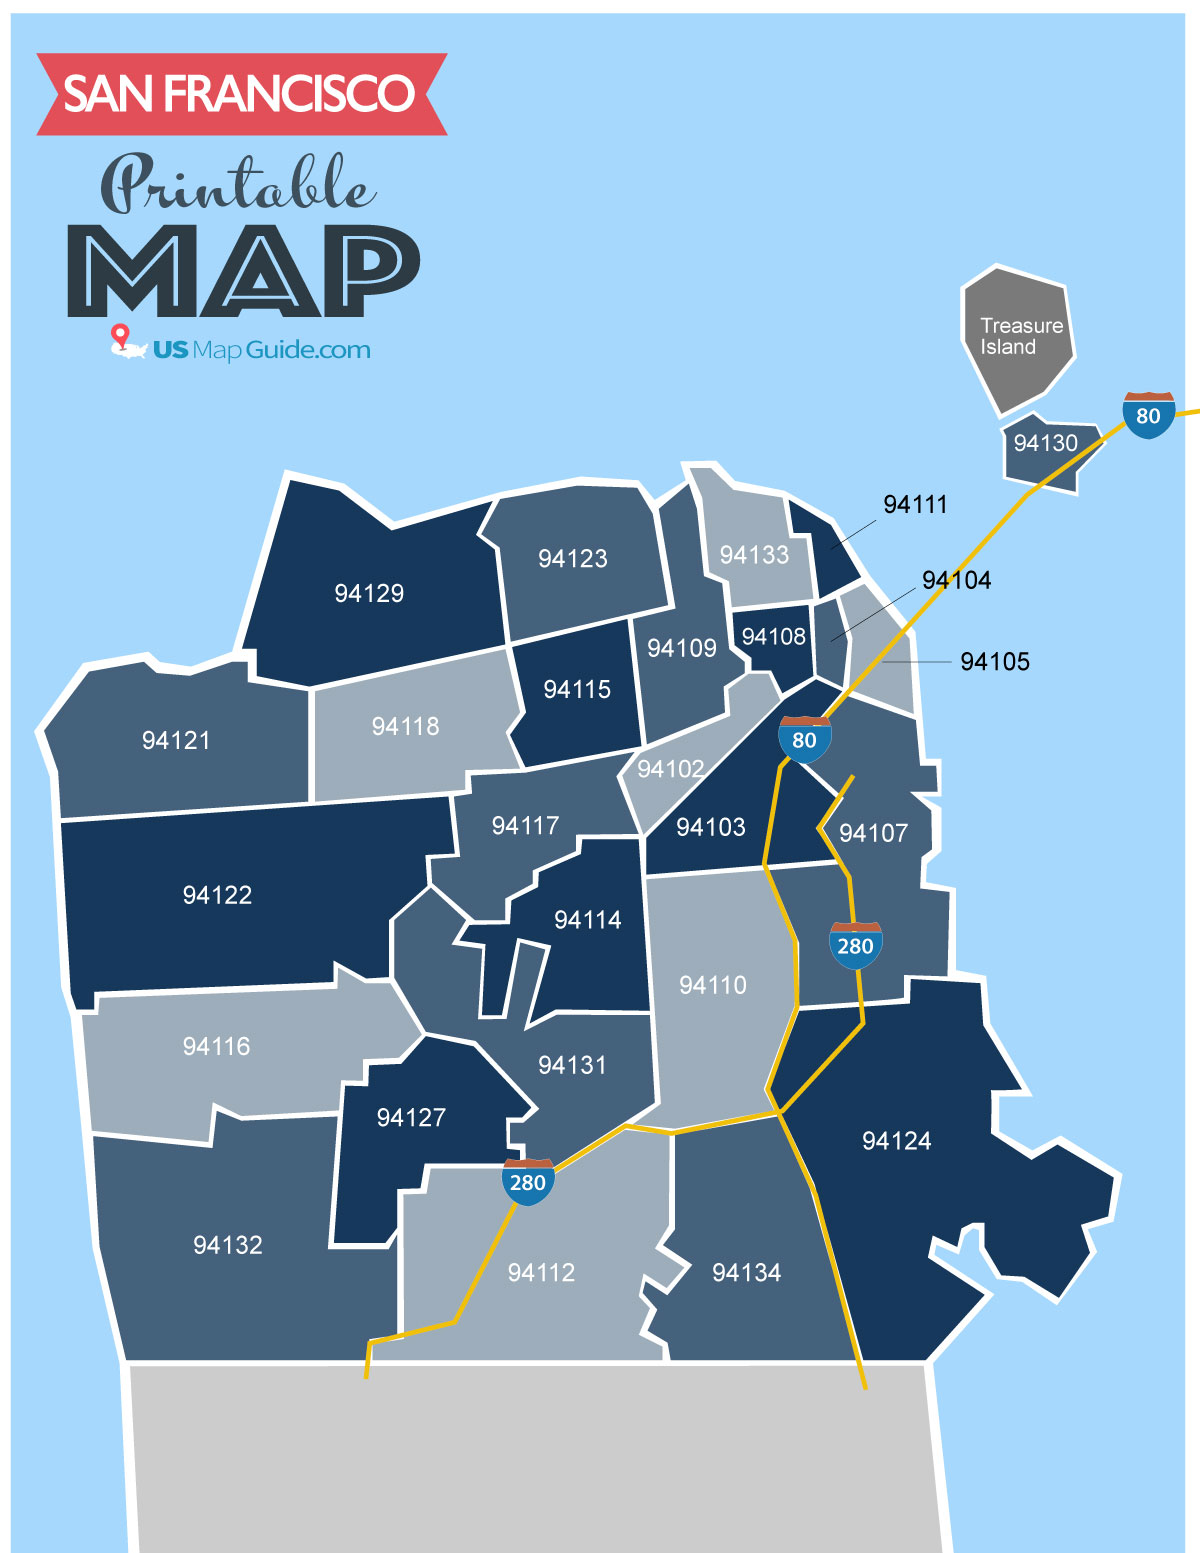

  
  
  

------------------------------------------------------------------------

## Question 3a<a href="#Question-3a" class="anchor-link">¶</a>

How many restaurants are in each ZIP code?

In the cell below, create a **series** where the index is the postal
code and the value is the number of records with that postal code in
descending order of count. You may need to use `groupby()`, `size()`, or
`value_counts()`. Do you notice any odd/invalid zip codes?

In \[29\]:

    zip_counts = bus.groupby('postal_code').size().sort_values(ascending=False)
    print(zip_counts.to_string())

    postal_code
    94103         562
    94110         555
    94102         456
    94107         408
    94133         398
    94109         382
    94111         259
    94122         255
    94105         249
    94118         231
    94115         230
    94108         229
    94124         218
    94114         200
    -9999         194
    94112         192
    94117         189
    94123         177
    94121         157
    94104         142
    94132         132
    94116          97
    94158          90
    94134          82
    94127          67
    94131          49
    94130           8
    94143           5
    94013           2
    94188           2
    CA              2
    94301           2
    94101           2
    95122           1
    941033148       1
    95133           1
    95132           1
    94102-5917      1
    94014           1
    941             1
    94080           1
    94105-2907      1
    92672           1
    64110           1
    00000           1
    94105-1420      1
    941102019       1
    95117           1
    95112           1
    95109           1
    95105           1
    94901           1
    94621           1
    94602           1
    94544           1
    94518           1
    94117-3504      1
    94120           1
    94122-1909      1
    94123-3106      1
    94124-1917      1
    94129           1
    Ca              1

In \[30\]:

    grader.check("q3a")

Out\[30\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 3b<a href="#Question-3b" class="anchor-link">¶</a>

Answer the following questions about the `postal_code` column in the
`bus` dataframe.

1.  The ZIP code column is which of the following type of data:
    1.  Quantitative Continuous
    2.  Quantitative Discrete
    3.  Qualitative Ordinal
    4.  Qualitative Nominal
2.  What Python data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

Please write your answers in the variables below:

In \[31\]:

    # The ZIP code column is which of the following type of data:
    #   "Quantitative Continuous" 
    #   "Quantitative Discrete"
    #   "Qualitative Ordinal"
    #   "Qualitative Nominal"
    q3b_part1 = "Qualitative Ordinal"

    # What Python data type is used to represent a ZIP code? 
    #    "str"
    #    "int"
    #    "bool"
    #    "float"
    q3b_part2 = "str"

In \[32\]:

    grader.check("q3b")

Out\[32\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 3c<a href="#Question-3c" class="anchor-link">¶</a>

In question 3a we noticed a large number of potentially invalid ZIP
codes (e.g., "Ca"). These are likely due to data entry errors. To get a
better understanding of the potential errors in the zip codes we will:

1.  Import a list of valid San Francisco ZIP codes by using
    `pd.read_json` to load the file `data/sf_zipcodes.json` and extract
    a **series** of type `str` containing the valid ZIP codes. *Hint:
    set `dtype` when invoking `read_json`.*
2.  Construct a `DataFrame` containing only the businesses which DO NOT
    have valid ZIP codes. You will probably want to use the
    `Series.isin` function.

**Step 1**

In \[33\]:

    valid_zips = pd.read_json('data/sf_zipcodes.json', dtype={'zip_codes': str})['zip_codes']
    valid_zips.head()

Out\[33\]:

    0    94102
    1    94103
    2    94104
    3    94105
    4    94107
    Name: zip_codes, dtype: object

In \[34\]:

    grader.check("q3ci")

Out\[34\]:

All tests passed!

**Step 2**

In \[35\]:

    invalid_zip_bus = bus[~bus['postal_code'].isin(valid_zips)]
    invalid_zip_bus.head(20)

Out\[35\]:

|     | bid    | name                              | address                             | city          | state | postal_code | latitude     | longitude    | phone_number |
|-----|--------|-----------------------------------|-------------------------------------|---------------|-------|-------------|--------------|--------------|--------------|
| 22  | 100126 | Lamas Peruvian Food Truck         | Private Location                    | San Francisco | CA    | -9999       | -9999.000000 | -9999.000000 | -9999        |
| 68  | 100417 | COMPASS ONE, LLC                  | 1 MARKET ST. FL                     | San Francisco | CA    | 94105-1420  | -9999.000000 | -9999.000000 | 14154324000  |
| 96  | 100660 | TEAPENTER                         | 1518 IRVING ST                      | San Francisco | CA    | 94122-1909  | -9999.000000 | -9999.000000 | 14155868318  |
| 109 | 100781 | LE CAFE DU SOLEIL                 | 200 FILLMORE ST                     | San Francisco | CA    | 94117-3504  | -9999.000000 | -9999.000000 | 14155614215  |
| 144 | 101084 | Deli North 200                    | 1 Warriors Way Level 300 North East | San Francisco | CA    | 94518       | -9999.000000 | -9999.000000 | -9999        |
| 156 | 101129 | Vendor Room 200                   | 1 Warriors Way Level 300 South West | San Francisco | CA    | -9999       | -9999.000000 | -9999.000000 | -9999        |
| 177 | 101192 | Cochinita #2                      | 2 Marina Blvd Fort Mason            | San Francisco | CA    | -9999       | -9999.000000 | -9999.000000 | 14150429222  |
| 276 | 102014 | DROPBOX (Section 3, Floor 7)      | 1800 Owens St                       | San Francisco | CA    | -9999       | -9999.000000 | -9999.000000 | -9999        |
| 295 | 102245 | Vessell CA Operations (#4)        | 2351 Mission St                     | San Francisco | CA    | -9999       | -9999.000000 | -9999.000000 | -9999        |
| 298 | 10227  | The Napper Tandy                  | 3200 24th St                        | San Francisco | CA    | -9999       | 37.752581    | -122.416482  | -9999        |
| 320 | 10372  | BERNAL HEIGHTS NEIGBORHOOD CENTER | 515 CORTLAND AVE                    | San Francisco | CA    | -9999       | 37.739110    | -122.416404  | 14155202142  |
| 321 | 10373  | El Tonayense #1                   | 1717 Harrison St                    | San Francisco | CA    | -9999       | 37.769426    | -122.413446  | 14155556127  |
| 322 | 10376  | Good Frikin Chicken               | 10 29th St                          | San Francisco | CA    | -9999       | 37.744369    | -122.420967  | -9999        |
| 324 | 10406  | Sunset Youth Services             | 3918 Judah St                       | San Francisco | CA    | -9999       | 37.760560    | -122.504027  | -9999        |
| 357 | 11416  | El Beach Burrito                  | 3914 Judah St                       | San Francisco | CA    | -9999       | 37.760851    | -122.503998  | -9999        |
| 381 | 12199  | El Gallo Giro                     | 3055 23rd St                        | San Francisco | CA    | -9999       | 37.754218    | -122.413285  | 14155553048  |
| 384 | 12344  | The Village Market & Pizza        | 750 Font Blvd                       | San Francisco | CA    | -9999       | 37.723462    | -122.483012  | 14155374525  |
| 406 | 13062  | Everett Middle School             | 450 Church St                       | San Francisco | CA    | -9999       | 37.763794    | -122.428617  | -9999        |
| 434 | 13753  | Taboun                            | 203 Parnassus Ave                   | San Francisco | CA    | -9999       | 37.764574    | -122.452950  | -9999        |
| 548 | 17423  | Project Open Hand                 | 100 Diamond St                      | San Francisco | CA    | -9999       | 37.760689    | -122.437252  | -9999        |

In \[36\]:

    grader.check("q3cii")

Out\[36\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 3d<a href="#Question-3d" class="anchor-link">¶</a>

In the previous question, many of the businesses had a common invalid
postal code that was likely used to encode a MISSING postal code. Do
they all share a potentially "interesting address"?

In the following cell, construct a **series** that counts the number of
businesses at each `address` that have this single likely MISSING postal
code value. Order the series in descending order by count.

After examining the output. Answer the following question by filling in
the appropriate variable. If we were to drop businesses with MISSING
postal code values would a particular class of business be affected? If
you are unsure try to search the web for the most common addresses.

In \[37\]:

    missing_zip_address_count = invalid_zip_bus[invalid_zip_bus["postal_code"] == '-9999'].groupby("address").size().sort_values(ascending = False)
    missing_zip_address_count.head()

Out\[37\]:

    address
    Off The Grid                  39
    Off the Grid                  10
    OTG                            4
    Approved Locations             3
    Approved Private Locations     3
    dtype: int64

In \[38\]:

    grader.check("q3d")

Out\[38\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 3e<a href="#Question-3e" class="anchor-link">¶</a>

**True or False**: *If we were to drop businesses with MISSING postal
code values, a particular class of business will be affected.*

In \[39\]:

    # True or False: 
    #  If we were to drop businesses with MISSING postal code values 
    #   a particular class of business be affected.
    q3d_true_or_false = True

In \[40\]:

    grader.check("q3e")

Out\[40\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 3f<a href="#Question-3f" class="anchor-link">¶</a>

Examine the `invalid_zip_bus` dataframe we computed above and look at
the businesses that DO NOT have the special MISSING ZIP code value. Some
of the invalid postal codes are just the full 9 digit code rather than
the first 5 digits. Create a new column named `postal5` in the original
`bus` dataframe which contains only the first 5 digits of the
`postal_code` column. Finally, for any of the `postal5` ZIP code entries
that were not a valid San Fransisco ZIP Code (according to `valid_zips`)
set the entry to `None`.

In \[41\]:

    bus['postal5'] = None
    bus['postal5'] = bus['postal_code'].str[0:5]
    bus.loc[~bus['postal5'].isin(valid_zips), 'postal5'] = None

    # Checking the corrected postal5 column
    bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

Out\[41\]:

|      | bid    | name                           | postal_code | postal5 |
|------|--------|--------------------------------|-------------|---------|
| 22   | 100126 | Lamas Peruvian Food Truck      | -9999       | None    |
| 68   | 100417 | COMPASS ONE, LLC               | 94105-1420  | 94105   |
| 96   | 100660 | TEAPENTER                      | 94122-1909  | 94122   |
| 109  | 100781 | LE CAFE DU SOLEIL              | 94117-3504  | 94117   |
| 144  | 101084 | Deli North 200                 | 94518       | None    |
| ...  | ...    | ...                            | ...         | ...     |
| 6173 | 99369  | HOTEL BIRON                    | 94102-5917  | 94102   |
| 6174 | 99376  | Mashallah Halal Food truck Ind | -9999       | None    |
| 6199 | 99536  | FAITH SANDWICH #2              | 94105-2907  | 94105   |
| 6204 | 99681  | Twister                        | 95112       | None    |
| 6241 | 99819  | CHESTNUT DINER                 | 94123-3106  | 94123   |

230 rows × 4 columns

In \[42\]:

    grader.check("q3f")

Out\[42\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

  
  
  

# 4: Investigate the Inspection Data<a href="#4:-Investigate-the-Inspection-Data" class="anchor-link">¶</a>

Let's now turn to the inspection DataFrame. Earlier, we found that `ins`
has 4 columns named `iid`, `score`, `date` and `type`. In this section,
we determine the granularity of `ins` and investigate the kinds of
information provided for the inspections.

Let's start by looking again at the first 5 rows of `ins` to see what
we're working with.

In \[43\]:

    ins.head(5)

Out\[43\]:

|     | iid             | date                   | score | type                  |
|-----|-----------------|------------------------|-------|-----------------------|
| 0   | 100010_20190329 | 03/29/2019 12:00:00 AM | -1    | New Construction      |
| 1   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled |
| 2   | 100017_20190417 | 04/17/2019 12:00:00 AM | -1    | New Ownership         |
| 3   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled |
| 4   | 100017_20190826 | 08/26/2019 12:00:00 AM | -1    | Reinspection/Followup |

  
  
  

------------------------------------------------------------------------

## Question 4a<a href="#Question-4a" class="anchor-link">¶</a>

The column `iid` probably corresponds to an inspection id. Is it a
primary key? Write an expression (line of code) that evaluates to 'True'
or 'False' based on whether all the values are unique.

In \[44\]:

    is_ins_iid_a_primary_key = ins['iid'].value_counts().max() == 1
    is_ins_iid_a_primary_key

Out\[44\]:

    True

In \[45\]:

    grader.check("q4a")

Out\[45\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 4b<a href="#Question-4b" class="anchor-link">¶</a>

The column `iid` appears to be the composition of two numbers and the
first number looks like a business id.

**Part 1.**: Create a new column called `bid` in the `ins` dataframe
containing just the business id. You will want to use `ins['iid'].str`
operations to do this. Also be sure to convert the type of this column
to `int`

**Part 2.**: Then compute how many values in this new column are invalid
business ids (i.e. do not appear in the `bus['bid']` column). This is
verifying a foreign key relationship. Consider using the
`pd.Series.isin` function.

**Part 3.**: Answer True or False, `ins['bid']` is a foreign key
reference to `bus['bid']`.

**No python `for` loops or list comprehensions required!**

**Part 1**

In \[46\]:

    ins['bid'] = ins['iid'].str.split("_").str[0].astype(int)
    ins.head()

Out\[46\]:

|     | iid             | date                   | score | type                  | bid    |
|-----|-----------------|------------------------|-------|-----------------------|--------|
| 0   | 100010_20190329 | 03/29/2019 12:00:00 AM | -1    | New Construction      | 100010 |
| 1   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled | 100010 |
| 2   | 100017_20190417 | 04/17/2019 12:00:00 AM | -1    | New Ownership         | 100017 |
| 3   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled | 100017 |
| 4   | 100017_20190826 | 08/26/2019 12:00:00 AM | -1    | Reinspection/Followup | 100017 |

In \[47\]:

    grader.check("q4bi")

Out\[47\]:

All tests passed!

**Part 2**

In \[48\]:

    invalid_bid_count = sum(~ins['bid'].isin(bus['bid']))
    invalid_bid_count

Out\[48\]:

    0

In \[49\]:

    grader.check("q4bii")

Out\[49\]:

All tests passed!

**Part 3**

In \[50\]:

    # True or False: The column ins['bid'] is a foreign key 
    #   referencing the bus['bid'] primary key.

    q4b_is_foreign_key = True

In \[51\]:

    grader.check("q4biii")

Out\[51\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 4c<a href="#Question-4c" class="anchor-link">¶</a>

What if we are interested in a time component of the inspection data? We
need to examine the date column of each inspection.

**Part 1:** What is the type of the individual `ins['date']` entries.
You may want to grab the very first entry and use the `type` function in
python.

**Part 2:** Use `pd.to_datetime` to create a new `ins['timestamp']`
column containing of `pd.Timestamp` objects. These will allow us to do
more date manipulation.

**Part 3:** What are the earliest and latest dates in our inspection
data? *Hint: you can use `min` and `max` on dates of the correct type.*

**Part 4:** We probably want to examine the inspections by year. Create
an additional `ins['year']` column containing just the year of the
inspection. Consider using `pd.Series.dt.year` to do this.

**No python `for` loops or list comprehensions required!**

**Part 1**

In \[52\]:

    ins_date_type = type(ins['date'][0])
    ins_date_type

Out\[52\]:

    str

In \[53\]:

    grader.check("q4ci")

Out\[53\]:

All tests passed!

**Part 2**

In \[54\]:

    srs = pd.to_datetime(ins['date'])
    ins['timestamp'] = srs

In \[55\]:

    grader.check("q4cii")

Out\[55\]:

All tests passed!

**Part 3**

In \[56\]:

    earliest_date = ins['timestamp'].min()
    latest_date = ins['timestamp'].max()

    print("Earliest Date:", earliest_date)
    print("Latest Date:", latest_date)

    Earliest Date: 2016-10-04 00:00:00
    Latest Date: 2019-11-28 00:00:00

In \[57\]:

    grader.check("q4ciii")

Out\[57\]:

All tests passed!

**Part 4**

In \[58\]:

    ins['year'] = ins['timestamp'].dt.year

In \[59\]:

    grader.check("q4civ")

Out\[59\]:

All tests passed!

In \[60\]:

    ins.head()

Out\[60\]:

|     | iid             | date                   | score | type                  | bid    | timestamp  | year |
|-----|-----------------|------------------------|-------|-----------------------|--------|------------|------|
| 0   | 100010_20190329 | 03/29/2019 12:00:00 AM | -1    | New Construction      | 100010 | 2019-03-29 | 2019 |
| 1   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled | 100010 | 2019-04-03 | 2019 |
| 2   | 100017_20190417 | 04/17/2019 12:00:00 AM | -1    | New Ownership         | 100017 | 2019-04-17 | 2019 |
| 3   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled | 100017 | 2019-08-16 | 2019 |
| 4   | 100017_20190826 | 08/26/2019 12:00:00 AM | -1    | Reinspection/Followup | 100017 | 2019-08-26 | 2019 |

  
  
  

------------------------------------------------------------------------

## Question 4d<a href="#Question-4d" class="anchor-link">¶</a>

What is the relationship between the type of inspection over the 2016 to
2019 timeframe?

**Part 1**

Construct the following table by

1.  Using the `pivot_table` containing the number (`size`) of
    inspections for the given `type` and `year`.
2.  Adding an extra `Total` column to the result using `sum`
3.  Sort the results in descending order by the `Total`.

| year                              | 2016 | 2017 | 2018 | 2019 | Total |
|-----------------------------------|------|------|------|------|-------|
| type                              |      |      |      |      |       |
| Routine - Unscheduled             | 966  | 4057 | 4373 | 4681 | 14077 |
| Reinspection/Followup             | 445  | 1767 | 1935 | 2292 | 6439  |
| New Ownership                     | 99   | 506  | 528  | 459  | 1592  |
| Complaint                         | 91   | 418  | 512  | 437  | 1458  |
| New Construction                  | 102  | 485  | 218  | 189  | 994   |
| Non-inspection site visit         | 51   | 276  | 253  | 231  | 811   |
| New Ownership - Followup          | 0    | 45   | 219  | 235  | 499   |
| Structural Inspection             | 1    | 153  | 50   | 190  | 394   |
| Complaint Reinspection/Followup   | 19   | 68   | 70   | 70   | 227   |
| Foodborne Illness Investigation   | 1    | 29   | 50   | 35   | 115   |
| Routine - Scheduled               | 0    | 9    | 8    | 29   | 46    |
| Administrative or Document Review | 2    | 1    | 1    | 0    | 4     |
| Multi-agency Investigation        | 0    | 0    | 1    | 2    | 3     |
| Special Event                     | 0    | 3    | 0    | 0    | 3     |
| Community Health Assessment       | 1    | 0    | 0    | 0    | 1     |

**No python `for` loops or list comprehensions required!**

In \[61\]:

    ins_pivot = ins.pivot_table(index = "type", columns = "year", aggfunc=len)['date']
    ins_pivot = ins_pivot.fillna(0).astype(int)

    ins_pivot['Total'] = ins_pivot.sum('columns')


    ins_pivot_sorted = ins_pivot.sort_values("Total", ascending=False)
    ins_pivot_sorted

Out\[61\]:

| year                              | 2016 | 2017 | 2018 | 2019 | Total |
|-----------------------------------|------|------|------|------|-------|
| type                              |      |      |      |      |       |
| Routine - Unscheduled             | 966  | 4057 | 4373 | 4681 | 14077 |
| Reinspection/Followup             | 445  | 1767 | 1935 | 2292 | 6439  |
| New Ownership                     | 99   | 506  | 528  | 459  | 1592  |
| Complaint                         | 91   | 418  | 512  | 437  | 1458  |
| New Construction                  | 102  | 485  | 218  | 189  | 994   |
| Non-inspection site visit         | 51   | 276  | 253  | 231  | 811   |
| New Ownership - Followup          | 0    | 45   | 219  | 235  | 499   |
| Structural Inspection             | 1    | 153  | 50   | 190  | 394   |
| Complaint Reinspection/Followup   | 19   | 68   | 70   | 70   | 227   |
| Foodborne Illness Investigation   | 1    | 29   | 50   | 35   | 115   |
| Routine - Scheduled               | 0    | 9    | 8    | 29   | 46    |
| Administrative or Document Review | 2    | 1    | 1    | 0    | 4     |
| Multi-agency Investigation        | 0    | 0    | 1    | 2    | 3     |
| Special Event                     | 0    | 3    | 0    | 0    | 3     |
| Community Health Assessment       | 1    | 0    | 0    | 0    | 1     |

In \[62\]:

    grader.check("q4di")

Out\[62\]:

All tests passed!

**Part 2**

Based on the above analysis, which year appears to have had a lot of
businesses in newly constructed buildings?

In \[63\]:

    year_of_new_construction = 2017

In \[64\]:

    grader.check("q4dii")

Out\[64\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 4e<a href="#Question-4e" class="anchor-link">¶</a>

Let's examine the inspection scores `ins['score']`

In \[65\]:

    ins['score'].value_counts().head()

Out\[65\]:

    -1      12632
     100     1993
     96      1681
     92      1260
     94      1250
    Name: score, dtype: int64

There are a large number of inspections with the `'score'` of `-1`.
These are probably missing values. Let's see what type of inspections
have scores and which do not. Create the following dataframe using steps
similar to the previous question, and assign it to to the variable
`ins_missing_score_pivot`.

You should observe that inspection scores appear only to be assigned to
`Routine - Unscheduled` inspections.

| Missing Score                     | False | True | Total |
|-----------------------------------|-------|------|-------|
| type                              |       |      |       |
| Routine - Unscheduled             | 14031 | 46   | 14077 |
| Reinspection/Followup             | 0     | 6439 | 6439  |
| New Ownership                     | 0     | 1592 | 1592  |
| Complaint                         | 0     | 1458 | 1458  |
| New Construction                  | 0     | 994  | 994   |
| Non-inspection site visit         | 0     | 811  | 811   |
| New Ownership - Followup          | 0     | 499  | 499   |
| Structural Inspection             | 0     | 394  | 394   |
| Complaint Reinspection/Followup   | 0     | 227  | 227   |
| Foodborne Illness Investigation   | 0     | 115  | 115   |
| Routine - Scheduled               | 0     | 46   | 46    |
| Administrative or Document Review | 0     | 4    | 4     |
| Multi-agency Investigation        | 0     | 3    | 3     |
| Special Event                     | 0     | 3    | 3     |
| Community Health Assessment       | 0     | 1    | 1     |

In \[66\]:

    ins['Missing Score'] = ins['score'] == -1
    ins_missing_score_pivot = ins.pivot_table(index = 'type', columns = 'Missing Score', aggfunc = len)['date'].fillna(0).astype(int)
    ins_missing_score_pivot['Total'] = ins_missing_score_pivot.sum("columns")
    ins_missing_score_pivot = ins_missing_score_pivot.sort_values('Total', ascending=False)
    ins_missing_score_pivot

Out\[66\]:

| Missing Score                     | False | True | Total |
|-----------------------------------|-------|------|-------|
| type                              |       |      |       |
| Routine - Unscheduled             | 14031 | 46   | 14077 |
| Reinspection/Followup             | 0     | 6439 | 6439  |
| New Ownership                     | 0     | 1592 | 1592  |
| Complaint                         | 0     | 1458 | 1458  |
| New Construction                  | 0     | 994  | 994   |
| Non-inspection site visit         | 0     | 811  | 811   |
| New Ownership - Followup          | 0     | 499  | 499   |
| Structural Inspection             | 0     | 394  | 394   |
| Complaint Reinspection/Followup   | 0     | 227  | 227   |
| Foodborne Illness Investigation   | 0     | 115  | 115   |
| Routine - Scheduled               | 0     | 46   | 46    |
| Administrative or Document Review | 0     | 4    | 4     |
| Multi-agency Investigation        | 0     | 3    | 3     |
| Special Event                     | 0     | 3    | 3     |
| Community Health Assessment       | 0     | 1    | 1     |

In \[67\]:

    grader.check("q4e")

Out\[67\]:

All tests passed!

Notice that inspection scores appear only to be assigned to
`Routine - Unscheduled` inspections. It is reasonable that for
inspection types such as `New Ownership` and `Complaint` to have no
associated inspection scores, but we might be curious why there are no
inspection scores for the `Reinspection/Followup` inspection type.

  
  
  

------------------------------------------------------------------------

  
  
  

# 5: Joining Data Across Tables<a href="#5:-Joining-Data-Across-Tables" class="anchor-link">¶</a>

In this question we will start to connect data across mulitple tables.
We will be using the `merge` function.

  
  
  

------------------------------------------------------------------------

## Question 5a<a href="#Question-5a" class="anchor-link">¶</a>

Let's figure out which restaurants had the lowest scores. Before we
proceed, let's filter out missing scores from `ins` so that negative
scores don't influence our results.

In \[68\]:

    ins = ins[ins["score"] > 0]
    ins.head()

Out\[68\]:

|     | iid             | date                   | score | type                  | bid    | timestamp  | year | Missing Score |
|-----|-----------------|------------------------|-------|-----------------------|--------|------------|------|---------------|
| 1   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled | 100010 | 2019-04-03 | 2019 | False         |
| 3   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled | 100017 | 2019-08-16 | 2019 | False         |
| 15  | 100041_20190520 | 05/20/2019 12:00:00 AM | 83    | Routine - Unscheduled | 100041 | 2019-05-20 | 2019 | False         |
| 20  | 100055_20190425 | 04/25/2019 12:00:00 AM | 98    | Routine - Unscheduled | 100055 | 2019-04-25 | 2019 | False         |
| 21  | 100055_20190912 | 09/12/2019 12:00:00 AM | 82    | Routine - Unscheduled | 100055 | 2019-09-12 | 2019 | False         |

We'll start by creating a new dataframe called `ins_named`. It should be
exactly the same as `ins`, except that it should have the name and
address of every business, as determined by the `bus` dataframe. If a
`business_id` in `ins` does not exist in `bus`, the name and address
should be given as `NaN`.

*Hint*: Use the merge method to join the `ins` dataframe with the
appropriate portion of the `bus` dataframe. See the official
[documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
on how to use `merge`.

*Note*: For quick reference, a pandas 'left' join keeps the keys from
the left frame, so if `ins` is the left frame, all the keys from `ins`
are kept and if a set of these keys don't have matches in the other
frame, the columns from the other frame for these "unmatched" key rows
contains NaNs.

In \[69\]:

    ins_named = pd.merge(ins, bus, how = 'left', on = ['bid'])
    columns_to_keep = list(ins.columns)
    columns_to_keep.extend(['name', 'address'])
    ins_named = ins_named[columns_to_keep]
    ins_named.head()

Out\[69\]:

|     | iid             | date                   | score | type                  | bid    | timestamp  | year | Missing Score | name                        | address                       |
|-----|-----------------|------------------------|-------|-----------------------|--------|------------|------|---------------|-----------------------------|-------------------------------|
| 0   | 100010_20190403 | 04/03/2019 12:00:00 AM | 100   | Routine - Unscheduled | 100010 | 2019-04-03 | 2019 | False         | ILLY CAFFE SF_PIER 39       | PIER 39 K-106-B               |
| 1   | 100017_20190816 | 08/16/2019 12:00:00 AM | 91    | Routine - Unscheduled | 100017 | 2019-08-16 | 2019 | False         | AMICI'S EAST COAST PIZZERIA | 475 06th St                   |
| 2   | 100041_20190520 | 05/20/2019 12:00:00 AM | 83    | Routine - Unscheduled | 100041 | 2019-05-20 | 2019 | False         | UNCLE LEE CAFE              | 3608 BALBOA ST                |
| 3   | 100055_20190425 | 04/25/2019 12:00:00 AM | 98    | Routine - Unscheduled | 100055 | 2019-04-25 | 2019 | False         | Twirl and Dip               | 335 Martin Luther King Jr. Dr |
| 4   | 100055_20190912 | 09/12/2019 12:00:00 AM | 82    | Routine - Unscheduled | 100055 | 2019-09-12 | 2019 | False         | Twirl and Dip               | 335 Martin Luther King Jr. Dr |

In \[70\]:

    grader.check("q5a")

Out\[70\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 5b<a href="#Question-5b" class="anchor-link">¶</a>

Let's look at the 20 businesses with the lowest **median** score. Order
your results by the median score followed by the business id to break
ties. The resulting table should look like:

*Hint: You may find the `as_index` argument important*

|      | bid   | name                               | median score |
|------|-------|------------------------------------|--------------|
| 3876 | 84590 | Chaat Corner                       | 54.0         |
| 4564 | 90622 | Taqueria Lolita                    | 57.0         |
| 4990 | 94351 | VBowls LLC                         | 58.0         |
| 2719 | 69282 | New Jumbo Seafood Restaurant       | 60.5         |
| 222  | 1154  | SUNFLOWER RESTAURANT               | 63.5         |
| 1991 | 39776 | Duc Loi Supermarket                | 64.0         |
| 2734 | 69397 | Minna SF Group LLC                 | 64.0         |
| 3291 | 78328 | Golden Wok                         | 64.0         |
| 4870 | 93150 | Chez Beesen                        | 64.0         |
| 4911 | 93502 | Smoky Man                          | 64.0         |
| 5510 | 98995 | Vallarta's Taco Bar                | 64.0         |
| 1457 | 10877 | CHINA FIRST INC.                   | 64.5         |
| 2890 | 71310 | Golden King Vietnamese Restaurant  | 64.5         |
| 4352 | 89070 | Lafayette Coffee Shop              | 64.5         |
| 505  | 2542  | PETER D'S RESTAURANT               | 65.0         |
| 2874 | 71008 | House of Pancakes                  | 65.0         |
| 818  | 3862  | IMPERIAL GARDEN SEAFOOD RESTAURANT | 66.0         |
| 2141 | 61427 | Nick's Foods                       | 66.0         |
| 2954 | 72176 | Wolfes Lunch                       | 66.0         |
| 4367 | 89141 | Cha Cha Cha on Mission             | 66.5         |

In \[71\]:

    twenty_lowest_scoring = ins_named[['bid', 'name', 'score']] 
    twenty_lowest_scoring = twenty_lowest_scoring.groupby(['bid', 'name'], as_index=False).median().sort_values('score')
    twenty_lowest_scoring = twenty_lowest_scoring.rename(columns={'score':'median score'})
    twenty_lowest_scoring = twenty_lowest_scoring.head(20)
    twenty_lowest_scoring

Out\[71\]:

|      | bid   | name                               | median score |
|------|-------|------------------------------------|--------------|
| 3876 | 84590 | Chaat Corner                       | 54.0         |
| 4564 | 90622 | Taqueria Lolita                    | 57.0         |
| 4990 | 94351 | VBowls LLC                         | 58.0         |
| 2719 | 69282 | New Jumbo Seafood Restaurant       | 60.5         |
| 222  | 1154  | SUNFLOWER RESTAURANT               | 63.5         |
| 1991 | 39776 | Duc Loi Supermarket                | 64.0         |
| 2734 | 69397 | Minna SF Group LLC                 | 64.0         |
| 4870 | 93150 | Chez Beesen                        | 64.0         |
| 4911 | 93502 | Smoky Man                          | 64.0         |
| 3291 | 78328 | Golden Wok                         | 64.0         |
| 5510 | 98995 | Vallarta's Taco Bar                | 64.0         |
| 2890 | 71310 | Golden King Vietnamese Restaurant  | 64.5         |
| 1457 | 10877 | CHINA FIRST INC.                   | 64.5         |
| 4352 | 89070 | Lafayette Coffee Shop              | 64.5         |
| 505  | 2542  | PETER D'S RESTAURANT               | 65.0         |
| 2874 | 71008 | House of Pancakes                  | 65.0         |
| 818  | 3862  | IMPERIAL GARDEN SEAFOOD RESTAURANT | 66.0         |
| 2141 | 61427 | Nick's Foods                       | 66.0         |
| 2954 | 72176 | Wolfes Lunch                       | 66.0         |
| 4367 | 89141 | Cha Cha Cha on Mission             | 66.5         |

In \[72\]:

    grader.check("q5b")

Out\[72\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

## Question 5c<a href="#Question-5c" class="anchor-link">¶</a>

Let's now examine the descriptions of violations for inspections with
`score > 0` and `score < 65`. Construct a **Series** indexed by the
`description` of the violation from the `vio` table with the value being
the number of times that violation occured for inspections with the
above score range. Sort the results in descending order of the count.

The first few entries should look like:

    Unclean or unsanitary food contact surfaces                                  43
    High risk food holding temperature                                           42
    Unclean or degraded floors walls or ceilings                                 40
    Unapproved or unmaintained equipment or utensils                             39

You will need to use `merge` twice.

In \[73\]:

    ins_sub = ins[(ins['score'] < 65) &  (ins['score'] > 0)]
    iid_vid = pd.merge(ins_sub, ins2vio, on='iid')
    ins_descript = pd.merge(iid_vid, vio, on='vid')
    low_score_violations = ins_descript.groupby('description').size().sort_values(ascending=False)

    low_score_violations.head(20)

Out\[73\]:

    description
    Unclean or unsanitary food contact surfaces                                  43
    High risk food holding temperature                                           42
    Unclean or degraded floors walls or ceilings                                 40
    Unapproved or unmaintained equipment or utensils                             39
    Foods not protected from contamination                                       37
    High risk vermin infestation                                                 37
    Inadequate food safety knowledge or lack of certified food safety manager    35
    Inadequate and inaccessible handwashing facilities                           35
    Improper thawing methods                                                     30
    Unclean hands or improper use of gloves                                      27
    Improper cooling methods                                                     25
    Unclean nonfood contact surfaces                                             21
    Inadequately cleaned or sanitized food contact surfaces                      20
    Improper food storage                                                        20
    Contaminated or adulterated food                                             18
    Moderate risk vermin infestation                                             15
    Permit license or inspection report not posted                               13
    Moderate risk food holding temperature                                       13
    Food safety certificate or food handler card not available                   12
    Improper storage use or identification of toxic substances                   10
    dtype: int64

In \[74\]:

    grader.check("q5c")

Out\[74\]:

All tests passed!

### Question 5d<a href="#Question-5d" class="anchor-link">¶</a>

Let's figure out which restaurant had the worst scores ever (single
lowest score).

In \[75\]:

    worst_restaurant = ins_named.sort_values('score').head(1)['score'].get(10898)
    worst_restaurant

Out\[75\]:

    45

**In the cell below, write the name of the restaurant** with the lowest
inspection scores ever. You can also head to yelp.com and look up the
reviews page for this restaurant. Feel free to add anything interesting
you want to share.

Lollipot

  
  
  
  

------------------------------------------------------------------------

  
  

## 6: Explore Inspection Scores<a href="#6:-Explore-Inspection-Scores" class="anchor-link">¶</a>

In this part we explore some of the basic inspection score values
visually.

  
  
  

------------------------------------------------------------------------

## Question 6a<a href="#Question-6a" class="anchor-link">¶</a>

Let's look at the distribution of inspection scores. As we saw before
when we called head on this data frame, inspection scores appear to be
integer values. The discreteness of this variable means that we can use
a barplot to visualize the distribution of the inspection score. Make a
bar plot of the counts of the number of inspections receiving each
score.

It should look like the image below. It does not need to look exactly
the same (e.g., no grid), but make sure that all labels and axes are
correct.

<span class="image placeholder" original-image-src="pics/6a.png"
original-image-title=""></span>

You might find this [matplotlib.pyplot
tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
useful. Key syntax that you'll need:

    plt.bar
    plt.xlabel
    plt.ylabel
    plt.title

*Note*: If you want to use another plotting library for your plots (e.g.
plotly, sns) you are welcome to use that library instead so long as it
works on DataHub. If you use seaborn sns.countplot(), you may need to
manually set what to display on xticks.

In \[76\]:

    score_counts = ins['score'].value_counts()
    plt.bar(score_counts.index, score_counts.values)
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.title("Distribution of Inspection Scores")

Out\[76\]:

    Text(0.5, 1.0, 'Distribution of Inspection Scores')

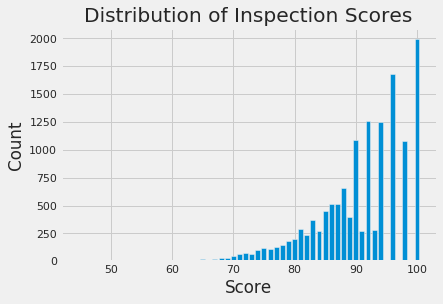

In \[77\]:

    score_counts

Out\[77\]:

    100    1993
    96     1681
    92     1260
    94     1250
    90     1085
    98     1080
    88      659
    86      516
    87      513
    85      453
    89      395
    83      367
    81      286
    93      277
    84      276
    91      268
    82      240
    80      197
    79      178
    78      149
    77      128
    75      120
    76      111
    74      101
    72       77
    73       69
    71       63
    70       48
    68       29
    69       28
    65       25
    67       24
    66       16
    64       15
    63       11
    62       10
    60        7
    59        5
    61        5
    58        4
    57        4
    55        3
    51        1
    45        1
    46        1
    54        1
    48        1
    Name: score, dtype: int64

  
  
  

------------------------------------------------------------------------

### Question 6b<a href="#Question-6b" class="anchor-link">¶</a>

Describe the qualities of the distribution of the inspections scores
based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and
anomalous values. Are there any unusual features of this distribution?
What do your observations imply about the scores?

The mode is at 100, along with a lack of symmetry (left-skewed) and it's
left tail, it seems to indicate that most restaurants receive decent
inspection scores that land heavily on the 85-100 interval. That said,
there are interesting gaps at 99, 97, and 95, indicating that no such
scores were given at all. With the knowledge that the lowest score is
45, these observations indicate that most restaurants tend to receive
inspection scores on the higher end of the spectrum, and there are
certain scores that have not been given during these inspections, which
could provide insight to the inspection rubric.

  
  
  
  

------------------------------------------------------------------------

  
  

## 7: Restaurant Ratings Over Time<a href="#7:-Restaurant-Ratings-Over-Time" class="anchor-link">¶</a>

Let's consider various scenarios involving restaurants with multiple
ratings over time.

  
  
  

------------------------------------------------------------------------

### Question 7a<a href="#Question-7a" class="anchor-link">¶</a>

Let's see which restaurant has had the most extreme improvement in its
rating, aka scores. Let the "swing" of a restaurant be defined as the
difference between its highest-ever and lowest-ever rating. **Only
consider restaurants with at least 3 ratings, aka rated for at least 3
times (3 scores)!** Using whatever technique you want to use, assign
`max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some
restaurants with multiple locations; each location has its own "swing".

The city would like to know if the state of food safety has been getting
better, worse, or about average. This is a pretty vague and broad
question, which you should expect as part of your future job as a data
scientist! However for the ease of grading for this assignment, we are
going to guide you through it and offer some specific directions to
consider.

In \[78\]:

    three_rates_or_more = ins_named.groupby('bid').size()
    three_rates_or_more_mask = three_rates_or_more.values >= 3
    three_rates_or_more = three_rates_or_more[three_rates_or_more_mask]

    three_rates_or_more = three_rates_or_more.index

    three_rates_table = ins_named[ins_named['bid'].isin(three_rates_or_more)]
    three_rates_table = three_rates_table[['score','bid','name']]

    max_diff_df = three_rates_table.groupby(['name', 'bid']).agg(lambda x: max(x) - min(x))
    max_diff_df = max_diff_df.rename(columns={'score' : 'score difference'})

    max_swing = max_diff_df.sort_values('score difference', ascending=False).head(1).index[0][0]
    max_swing

Out\[78\]:

    'Lollipot'

In \[79\]:

    grader.check("q7a")

Out\[79\]:

All tests passed!

  
  
  

------------------------------------------------------------------------

### Question 7b<a href="#Question-7b" class="anchor-link">¶</a>

To get a sense of the number of times each restaurant has been
inspected, create a multi-indexed dataframe called
`inspections_by_id_and_year` where each row corresponds to data about a
given business in a single year, and there is a single data column named
count that represents the number of inspections for that business in
that year. The first index in the MultiIndex should be on `bid`, and the
second should be on year.

For example, a sample row in this dataframe will tell you that for `bid`
573, in `year` 2017, the total number of inspections was 4.

Hint: Use `groupby` to group based on both the `bid` and the `year`.

Hint: Use `rename` to change the name of the column to count.

In \[80\]:

    inspections_by_id_and_year = ins.groupby(['bid', 'year']).count()[['date']].rename(columns={'date':'count'})
    inspections_by_id_and_year.head()

Out\[80\]:

|     |      | count |
|-----|------|-------|
| bid | year |       |
| 19  | 2017 | 1     |
|     | 2018 | 1     |
| 24  | 2016 | 1     |
|     | 2017 | 1     |
|     | 2019 | 1     |

In \[81\]:

    grader.check("q7b")

Out\[81\]:

All tests passed!

You should see that some businesses are inspected many times in a single
year. Let's get a sense of the distribution of the counts of the number
of inspections by calling `value_counts`. There are quite a lot of
businesses with 2 inspections in the same year, so it seems like it
might be interesting to see what we can learn from such businesses.

In \[82\]:

    inspections_by_id_and_year['count'].value_counts()

Out\[82\]:

    1    10580
    2     1688
    3       25
    Name: count, dtype: int64

  
  
  

------------------------------------------------------------------------

### Question 7c<a href="#Question-7c" class="anchor-link">¶</a>

What's the relationship between the first and second scores for the
businesses with 2 inspections in a year? Do they typically improve? For
simplicity, let's focus on only 2018 for this problem, using `ins2018`
data frame that will be created for you below.

First, make a dataframe called `scores_pairs_by_business` indexed by
`business_id` (containing only businesses with exactly 2 inspections in
2018). This dataframe contains the field score_pair consisting of the
score pairs ordered chronologically \[first_score, second_score\].

Plot these scores. That is, make a scatter plot to display these pairs
of scores. Include on the plot a reference line with slope 1.

You may find the functions `sort_values`, `groupby`, `filter` and `agg`
helpful, though not all necessary.

The first few rows of the resulting table should look something like:

| **bid** | **score_pair** |
|---------|----------------|
| 48      | \[94, 87\]     |
| 66      | \[98, 98\]     |
| 146     | \[81, 90\]     |
| 184     | \[90, 96\]     |
| 273     | \[83, 84\]     |

In the cell below, create `scores_pairs_by_business` as described above.

Note: Each score pair must be a list type; numpy arrays will not pass
the autograder.

Hint: Use the filter method from lecture 5 to create a new dataframe
that only contains restaurants that received exactly 2 inspections.

Hint: Our code that creates the needed DataFrame is a single line of
code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and
`rename` in that order. Your answer does not need to use these exact
methods.

In \[83\]:

    ins2018 = ins[ins['year'] == 2018]
    # Create the dataframe here
    scores_pairs_by_business = ins2018[['bid', 'timestamp', 'score']].sort_values(['bid','timestamp'])
    scores_pairs_by_business = scores_pairs_by_business.groupby('bid').filter(lambda x : len(x) == 2).groupby('bid').agg(lambda x: list(x))[['score']].rename(columns={'score':'score_pair'})
    scores_pairs_by_business

Out\[83\]:

|       | score_pair   |
|-------|--------------|
| bid   |              |
| 48    | \[94, 87\]   |
| 66    | \[98, 98\]   |
| 146   | \[81, 90\]   |
| 184   | \[90, 96\]   |
| 273   | \[83, 84\]   |
| ...   | ...          |
| 95621 | \[100, 100\] |
| 95628 | \[75, 75\]   |
| 95674 | \[100, 96\]  |
| 95761 | \[91, 87\]   |
| 95764 | \[100, 92\]  |

535 rows × 1 columns

In \[84\]:

    grader.check("q7ci")

Out\[84\]:

All tests passed!

Now, create your scatter plot in the cell below. It does not need to
look exactly the same (e.g., no grid) as the sample below, but make sure
that all labels, axes and data itself are correct.

<span class="image placeholder" original-image-src="pics/7c.png"
original-image-title=""></span>

Key pieces of syntax you'll need:

`plt.scatter` plots a set of points. Use `facecolors='none'` and
`edgecolors=b` to make circle markers with blue borders.

`plt.plot` for the reference line.

`plt.xlabel`, `plt.ylabel`, `plt.axis`, and `plt.title`.

Hint: You may find it convenient to use the `zip()` function to unzip
scores in the list.

In \[85\]:

    first, second = zip(*list(scores_pairs_by_business['score_pair']))
    x_axis = np.arange(55, 100)
    y_axis = np.arange(55, 100)
    plt.plot(x_axis, y_axis)
    plt.scatter(first, second, facecolors='none', edgecolors='b')
    plt.xlabel("First Score")
    plt.ylabel("Second Score")
    plt.title("First Inspection Score vs Second Inspection Score")
    plt.axis([55, 100, 55, 100])

Out\[85\]:

    [55, 100, 55, 100]

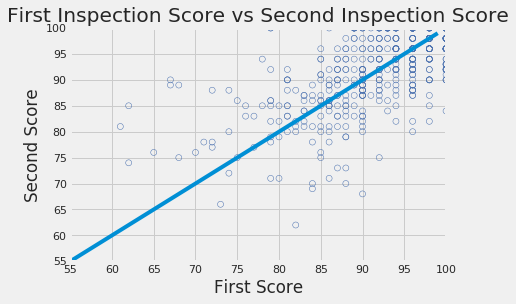

  
  
  

------------------------------------------------------------------------

### Question 7d<a href="#Question-7d" class="anchor-link">¶</a>

Another way to compare the scores from the two inspections is to examine
the difference in scores. Subtract the first score from the second in
`scores_pairs_by_business`. Make a histogram of these differences in the
scores. We might expect these differences to be positive, indicating an
improvement from the first to the second inspection.

The histogram should look like this:

<span class="image placeholder" original-image-src="pics/7d.png"
original-image-title=""></span>

Hint: Use `second_score` and `first_score` created in the scatter plot
code above.

Hint: Convert the scores into numpy arrays to make them easier to deal
with.

Hint: Use `plt.hist()` Try changing the number of bins when you call
`plt.hist()`.

In \[86\]:

    score_diff = np.array(second) - np.array(first)
    plt.hist(score_diff, bins=30)
    plt.xlabel("Score Difference (Second Score - First Score)")
    plt.ylabel("Count")
    plt.title("Distribution of Score Differences")

Out\[86\]:

    Text(0.5, 1.0, 'Distribution of Score Differences')

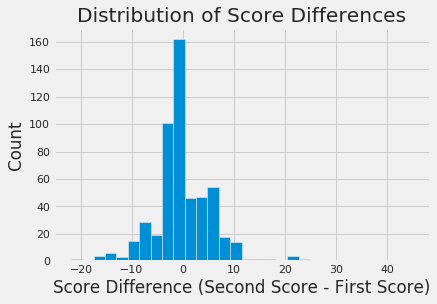

  
  
  

------------------------------------------------------------------------

### Question 7e<a href="#Question-7e" class="anchor-link">¶</a>

If restaurants' scores tend to improve from the first to the second
inspection, what do you expect to see in the scatter plot that you made
in question 7c? What do you oberve from the plot? Are your observations
consistent with your expectations?

Hint: What does the slope represent?

If scores tend to improve on the second inspection, we would expect more
points on the scatter plot to lie above the reference line. Since the
reference line slope is 1, the points that lie on the line indicate that
the first and second scores are the same. Observing the graph in 7c, we
can notice that the points are quite evenly distributed both above and
below the reference line, if not slightly more concentrated below. This
shows that the number of restaurants that improve and the number of
restaurants that get lower scores are roughly around the same, which is
consistent with my expectation since it is likely that restaurants that
do well on the first inspection may slack, those that do fine just
continue the same, and those that don't do well try to do better next
time.

  
  
  

------------------------------------------------------------------------

### Question 7f<a href="#Question-7f" class="anchor-link">¶</a>

If a restaurant's score improves from the first to the second
inspection, how would this be reflected in the histogram of the
difference in the scores that you made in question 7d? What do you
oberve from the plot? Are your observations consistent with your
expectations? Explain your observations in the language of Statistics:
for instance, the center, the spread, the deviation etc.

If a restaurant's score improves, it would contribute to one of the
counts with a positive score difference. Observing the plot, we see that
the center of the plot is around 0, with a somewhat even spread and
relatively low deviation. This means that many restaurants scored around
the same during both inspections. The even spread around the center then
speaks to the conclusion that the number of restaurants that did better
and the number of restaurants that did worse are also around the same,
which is reflective of my expectations as explained in the previous
question.

  
  
  

------------------------------------------------------------------------

### Question 7g<a href="#Question-7g" class="anchor-link">¶</a>

To wrap up our analysis of the restaurant ratings over time, one final
metric we will be looking at is the distribution of restaurant scores
over time. Create a side-by-side boxplot that shows the distribution of
these scores for each different risk category from 2017 to 2019. Use a
figure size of at least 12 by 8.

The boxplot should look similar to the sample below. Make sure the boxes
are in the correct order!

<span class="image placeholder" original-image-src="pics/7g.png"
original-image-title=""></span>

**Hint**: Use `sns.boxplot()`. Try taking a look at the first several
parameters. [The documentation is linked
here!](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

**Hint**: Use `plt.figure()` to adjust the figure size of your plot.

In \[87\]:

    # Do not modify this line
    sns.set()

    ins_post_2017 = ins[ins['year'] >= 2017]
    get_vid = pd.merge(ins_post_2017, ins2vio, on='iid')[['score', 'year', 'vid']]
    get_risk = pd.merge(get_vid, vio, on='vid')[['score', 'year', 'risk_category']]
    plt.figure(figsize=[12,8])
    ax = sns.boxplot(x='year', y='score', hue='risk_category', hue_order = ['Low Risk', 'Moderate Risk', 'High Risk'], data=get_risk)

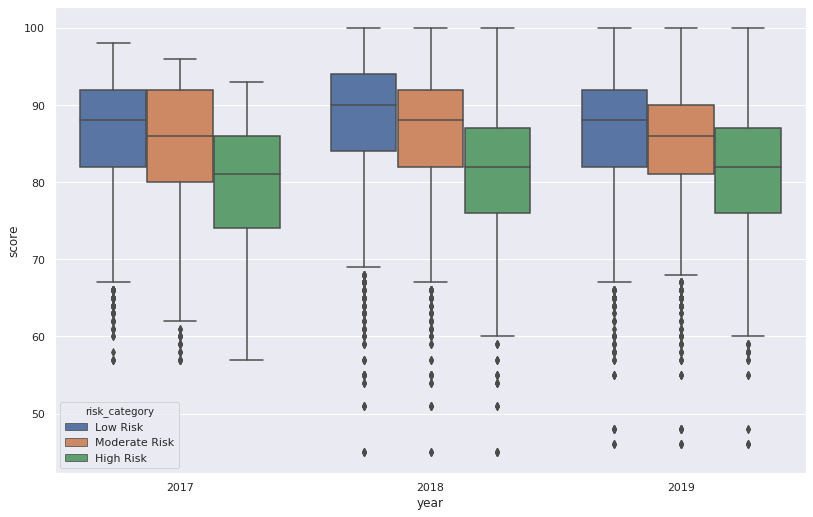

## Summary of Inspections Data<a href="#Summary-of-Inspections-Data" class="anchor-link">¶</a>

We have done a lot in this project! Below are some examples of what we
have learned about the inspections data through some cool
visualizations!

-   We found that the records are at the inspection level and that we
    have inspections for multiple years.
-   We also found that many restaurants have more than one inspection a
    year.
-   By joining the business and inspection data, we identified the name
    of the restaurant with the worst rating and optionally the names of
    the restaurants with the best rating.
-   We identified the restaurant that had the largest swing in rating
    over time.
-   We also examined the change of scores over time! Many restaurants
    are not actually doing better.

  
  
  

------------------------------------------------------------------------

  
  
  

# 8: Open Ended Question<a href="#8:-Open-Ended-Question" class="anchor-link">¶</a>

## Question 8a<a href="#Question-8a" class="anchor-link">¶</a>

### Compute Something Interesting<a href="#Compute-Something-Interesting" class="anchor-link">¶</a>

Play with the data and try to compute something interesting about the
data. Please try to use at least one of groupby, pivot, or merge (or all
of the above).

Please show your work in the cell below and describe in words what you
found in the same cell. This question will be graded leniently but good
solutions may be used to create future homework problems.

### Grading<a href="#Grading" class="anchor-link">¶</a>

Since the question is more open ended, we will have a more relaxed
rubric, classifying your answers into the following three categories:

-   **Great** (4 points): Uses a combination of pandas operations (such
    as groupby, pivot, merge) to answer a relevant question about the
    data. The text description provides a reasonable interpretation of
    the result.
-   **Passing** (1-3 points): Computation is flawed or very simple. The
    text description is incomplete but makes some sense.
-   **Unsatisfactory** (0 points): No computation is performed, or a
    computation with completely wrong results.

**Please have both your code and your explanation in the same one cell
below. Any work in any other cell will not be graded.**

In \[88\]:

    #YOUR CODE HERE
    risk_iid = pd.merge(vio[['risk_category', 'vid']], ins2vio, on='vid')
    risk_bid = pd.merge(risk_iid, ins[['iid', 'bid']], on='iid')
    risk_postal = pd.merge(risk_bid, bus[['bid', 'postal5']]).rename(columns={'postal5':'postal'})
    risks_by_postal = risk_postal.groupby(['postal', 'risk_category'], as_index=False).count()

    pivoted_risks_postal = risks_by_postal.pivot_table(index='postal', columns='risk_category', values='vid', aggfunc=sum).fillna(0)
    pivoted_risks_postal = pivoted_risks_postal.sort_values(['High Risk','Moderate Risk', 'Low Risk'], ascending=False)[['High Risk', 'Moderate Risk', 'Low Risk']]

    percentage_high_risk = pivoted_risks_postal.copy()
    percentage_high_risk['Total Inspections'] = percentage_high_risk.sum('columns')
    percentage_high_risk['% of High Risk'] = round((percentage_high_risk['High Risk'] / percentage_high_risk['Total Inspections']) * 100, 2)
    percentage_high_risk = percentage_high_risk.sort_values('% of High Risk', ascending=False)

    display(pivoted_risks_postal.head())
    display(percentage_high_risk.head())

    #YOUR EXPLANATION HERE (in a comment)
    # Here we are drawing a relationship between zipcodes/location and risk levels finding the top 5 postal codes (5-digit postal codes only) with the highest number of inspection labels resulting in a "High Risk" risk category. By providing the pivoted table, we can also observe how many of each risk category inspections took place in this area. These results indicate that restaurants in the 94110 area have been labelled high risk 599 times, moderate 1624 times, and low 2076 times. Similarly, we can find the risk levels associated with the other zip codes as well. In the second dataframe, we compute the % of high risk labels out of all the risk labels done and returning them in descending order. This metric takes into account how many restaurant inspections that returned a risk factor were done in the first place, as the more inspections done lead to more "high risk" occurrences, so this second dataframe gives relatively which areas have the most high risk labels.

| risk_category | High Risk | Moderate Risk | Low Risk |
|---------------|-----------|---------------|----------|
| postal        |           |               |          |
| 94110         | 599.0     | 1624.0        | 2076.0   |
| 94103         | 549.0     | 1364.0        | 1367.0   |
| 94118         | 375.0     | 722.0         | 931.0    |
| 94109         | 349.0     | 921.0         | 1331.0   |
| 94102         | 340.0     | 909.0         | 1246.0   |

| risk_category | High Risk | Moderate Risk | Low Risk | Total Inspections | % of High Risk |
|---------------|-----------|---------------|----------|-------------------|----------------|
| postal        |           |               |          |                   |                |
| 94188         | 1.0       | 0.0           | 1.0      | 2.0               | 50.00          |
| 94143         | 2.0       | 7.0           | 1.0      | 10.0              | 20.00          |
| 94105         | 271.0     | 603.0         | 583.0    | 1457.0            | 18.60          |
| 94118         | 375.0     | 722.0         | 931.0    | 2028.0            | 18.49          |
| 94134         | 125.0     | 254.0         | 311.0    | 690.0             | 18.12          |

  
  
  
  

------------------------------------------------------------------------

  
  

## Question 8b<a href="#Question-8b" class="anchor-link">¶</a>

### Create some more cool visualizations!<a href="#Create-some-more-cool-visualizations!"
class="anchor-link">¶</a>

  

Play with the data, and try to produce some visualizations to answer one
question that you find interesting regarding the data. You might want to
use `merge`/`groupby`/`pivot` to process the data before creating
visualizations.

Please show your work in the cells below (feel free to use extra cells
if you want), and describe in words what you found in the same cell.
This question will be graded leniently, but good solutions may be used
to create future homework problems.

### Grading<a href="#Grading" class="anchor-link">¶</a>

Since the question is more open ended, we will have a more relaxed
rubric, classifying your answers into the following three categories:

-   **Great** (4 points): The chart is well designed, and the data
    computation is correct. The text written articulates a reasonable
    metric and correctly describes the relevant insight and answer to
    the question you are interested in.
-   **Passing** (1-3 points): A chart is produced but with some flaws
    such as bad encoding. The text written is incomplete but makes some
    sense.
-   **Unsatisfactory** (0 points): No chart is created, or a chart with
    completely wrong results.

We will lean towards being generous with the grading. We might also
either discuss in discussion or post on Piazza some examplar analysis
you have done (with your permission)!

You should have the following in your answers:

-   a few visualizations; Please limit your visualizations to 5 plots.
-   a few sentences (not too long please!)

Please note that you will only receive support in OH and Piazza for
Matplotlib and seaborn questions. However, you may use some other Python
libraries to help you create you visualizations. If you do so, make sure
it is compatible with the PDF export (e.g., Plotly does not create PDFs
properly, which we need for Gradescope).

In \[89\]:

    # YOUR DATA PROCESSING AND PLOTTING HERE


    plt.subplot(2,1,2)
    bx = plt.bar(percentage_high_risk.index, percentage_high_risk["% of High Risk"])
    plt.xlabel("Postal Code")
    plt.xticks(rotation=90)
    plt.ylim(0, 50)
    plt.ylabel("% of Inspections with High Risk")
    plt.title("Percentage of High Risk Results by Postal Code")

    ax = pivoted_risks_postal.plot.bar(figsize=(16,8), title="Risk Label Counts Per Postal Code", xlabel="Postal Code", ylabel="Count")

    # YOUR EXPLANATION HERE (in a comment)
    # Answering the same question from above on the relationship between postal areas and risk labels, we have two plots that convey the information from the two dataframes. The first plot shows a bar graph of each postal code and the percentage of labels with high-risk labels, with 94188 with the highest percentage. The second plot plots the raw counts of each risk category label for all affiliated postal codes, with 94110 having the highest count of high risks.

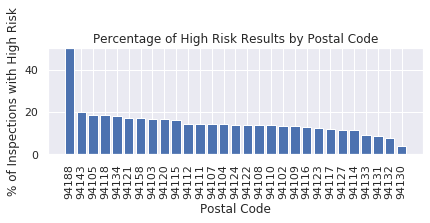

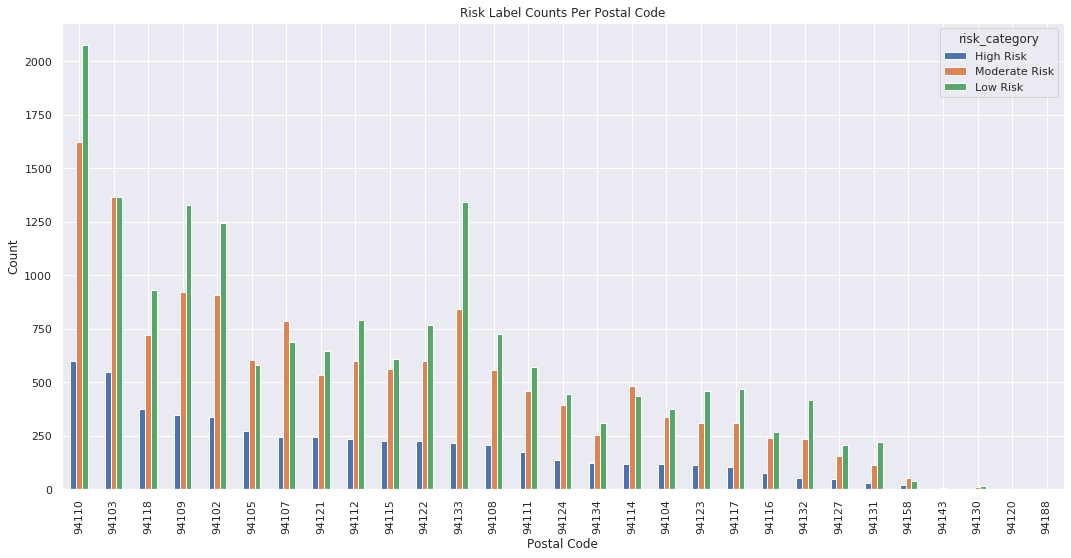

In \[90\]:

    # THIS CELL AND ANY CELLS ADDED BELOW WILL NOT BE GRADED

## Congratulations! You have finished Project 1!<a href="#Congratulations!-You-have-finished-Project-1!"
class="anchor-link">¶</a>

------------------------------------------------------------------------

To double-check your work, the cell below will rerun all of the
autograder tests.

In \[91\]:

    grader.check_all()

Out\[91\]:

**q1a:**

All tests passed!

**q1d:**

All tests passed!

**q2a:**

All tests passed!

**q2b:**

All tests passed!

**q2ci:**

All tests passed!

**q2cii:**

All tests passed!

**q2d:**

All tests passed!

**q3a:**

All tests passed!

**q3b:**

All tests passed!

**q3ci:**

All tests passed!

**q3cii:**

All tests passed!

**q3d:**

All tests passed!

**q3e:**

All tests passed!

**q3f:**

All tests passed!

**q4a:**

All tests passed!

**q4bi:**

All tests passed!

**q4bii:**

All tests passed!

**q4biii:**

All tests passed!

**q4ci:**

All tests passed!

**q4cii:**

All tests passed!

**q4ciii:**

All tests passed!

**q4civ:**

All tests passed!

**q4di:**

All tests passed!

**q4dii:**

All tests passed!

**q4e:**

All tests passed!

**q5a:**

All tests passed!

**q5b:**

All tests passed!

**q5c:**

All tests passed!

**q7a:**

All tests passed!

**q7b:**

All tests passed!

**q7ci:**

All tests passed!

## Submission<a href="#Submission" class="anchor-link">¶</a>

Make sure you have run all cells in your notebook in order before
running the cell below, so that all images/graphs appear in the output.
The cell below will generate a zip file for you to submit. **Please save
before exporting!**

In \[92\]:

    # Save your notebook first, then run this cell to export your submission.
    grader.export("proj1.ipynb")

Your submission has been exported. Click
<a href="proj1.zip" target="_blank">here</a> to download the zip file.